In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


<h2>Dataset</h2>
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

* Time period: Donated to UCI ML 27 April 1987

Attribute Information: (classes: edible=e, poisonous=p)

* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
* bruises: bruises=t,no=f
* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
* gill-attachment: attached=a,descending=d,free=f,notched=n
* gill-spacing: close=c,crowded=w,distant=d
* gill-size: broad=b,narrow=n
* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
* stalk-shape: enlarging=e,tapering=t
* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* veil-type: partial=p,universal=u
* veil-color: brown=n,orange=o,white=w,yellow=y
* ring-number: none=n,one=o,two=t
* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/kaggle/input/mushroom-classification/mushrooms.csv")
for c in data.columns:
    data[c] = data[c].factorize()[0]

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


In [6]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    data.drop(['class'], axis=1), data['class'],
    test_size=0.33
)

Let's evaluate the importance of parameters using a random forest

In [7]:
rfc = RandomForestClassifier()
rfc.fit(data.drop(['class'], axis = 1),
        data['class'])

RandomForestClassifier()

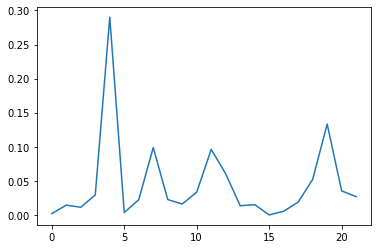

In [8]:
plt.plot(rfc.feature_importances_)

As we can see on the plot above, 4 parameters are important for evaluating the goal. It's 'odor', 'spore-print-color', 'gill-size', 'stalk-surface-above-ring'. Moreover, 'odor' looks the most informative of all

In [9]:
X_train.columns[rfc.feature_importances_.argsort()[::-1][0:4]]

Index(['odor', 'spore-print-color', 'gill-size', 'stalk-surface-above-ring'], dtype='object')

In [10]:
data[['class', 'odor']].groupby(by=['odor'], as_index = False).agg(['mean', 'count'])

class      
          mean count
odor                
0     0.000000   256
1     1.000000   400
2     1.000000   400
3     0.965986  3528
4     0.000000  2160
5     0.000000   192
6     0.000000   576
7     0.000000   576
8     0.000000    36

It seems that we can build a model using just one parameter. Let's try to do this and evaluate the result

In [11]:
y_hat = [1 if row['odor'] in [1,2,3] else 0 for i, row in X_test.iterrows()]

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_hat, Y_test)

0.9835882133532264

We obtained an accuracy of about 0.98 using only one parameter. Let's also try to build a model using all 4 most informative ones

In [13]:
data[['class', 'spore-print-color']].groupby(by='spore-print-color', as_index=False).agg(['mean', 'count'])

class      
                       mean count
spore-print-color                
0                  0.880342  1872
1                  0.886179  1968
2                  1.000000    48
3                  0.029412  1632
4                  0.241206  2388
5                  0.000000    72
6                  1.000000    48
7                  1.000000    48
8                  1.000000    48

In [14]:
data[['class', 'gill-size']].groupby(by='gill-size', as_index=False).agg(['mean', 'count'])

class      
               mean count
gill-size                
0          0.114650  2512
1          0.698503  5612

In [15]:
data[['class', 'stalk-surface-above-ring']].groupby(by='stalk-surface-above-ring', as_index=False).agg(['mean', 'count'])

class      
                              mean count
stalk-surface-above-ring                
0                         0.703246  5176
1                         0.739130   552
2                         0.060708  2372
3                         0.666667    24

In [16]:
important_features = ['odor', 'spore-print-color', 'gill-size', 'stalk-surface-above-ring']

In [17]:
X_train, X_test = X_train[important_features], X_test[important_features]

In [18]:
forest_classifier = RandomForestClassifier(
    n_estimators=50, min_samples_split = 10
)
forest_classifier.fit(X_train, Y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50)

In [19]:
accuracy_score(Y_test, forest_classifier.predict(X_test))

0.9985080193957478

In total, we got an accuracy close to 1, which further increased our result